In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)



,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
facts_5 = "SELECT * FROM facts limit 5"
pd.read_sql_query(facts_5, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [8]:
pop_stat = "SELECT min(population), max(population), min(population_growth), max(population_growth) from facts"


pd.read_sql_query(pop_stat, conn)





,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [15]:
pop_0 = "SELECT * from facts where population = (SELECT min(population) from facts)"

pd.read_sql_query(pop_0, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [17]:
pop_max = "SELECT * from facts where population = (SELECT max(population) from facts)"

pd.read_sql_query(pop_max, conn)



,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


**Results**

We can see that the country Antartica has a population of 0 where the World has a maximum population of 7256490011

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b6f4ceeb8>,
      dtype=object)

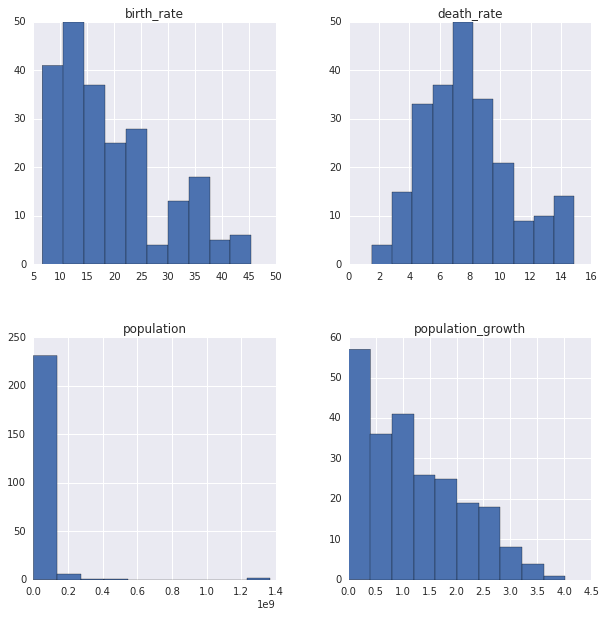

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

grid = plt.figure(figsize=(10,10))
axis = grid.add_subplot(111)


display_query = '''
select population, population_growth, birth_rate, death_rate from facts
where population != (select max(population) from facts) and
population != (select max(population) from facts);

'''

pd.read_sql_query(display_query, conn).hist(ax=axis)

In [45]:
pop_dens = '''

select name, population, 
cast(population as float)/cast(area as float) Density
from facts order by Density desc


'''

pd.read_sql_query(pop_dens, conn)

,name,population,Density
0,Macau,5.927310e+05,21168.964286
1,Monaco,3.053500e+04,15267.500000
2,Singapore,5.674472e+06,8141.279770
3,Hong Kong,7.141106e+06,6445.041516
4,Gaza Strip,1.869055e+06,5191.819444
5,Gibraltar,2.925800e+04,4876.333333
6,Bahrain,1.346613e+06,1771.859211
7,Maldives,3.932530e+05,1319.640940
8,Malta,4.139650e+05,1310.015823
9,Bermuda,7.019600e+04,1299.925926
